In [1]:
# Check if curve_db is loaded, if not load it
try:
    curve_db
    print(f"✓ curve_db is already loaded with {len(curve_db)} isogeny classes")
except NameError:
    print("Loading curve database...")
    curve_db = load('Curve Database (Conductor < 100 000)/curve_database_c1_to_100000.sobj')
    print(f"✓ Loaded curve_db with {len(curve_db)} isogeny classes")
print()

Loading curve database...
✓ Loaded curve_db with 437226 isogeny classes



In [2]:
data = load('phi_scan_results/(-2000,2000)_phi_scan_data')

In [5]:
phi_reps = data['phi_reps']

In [6]:
data.keys()

dict_keys(['phi_reps', 'conductors', 'isogeny_classes', 'total_phis_generated', 'total_found', 'nmin', 'nmax'])

In [7]:
isos = data['isogeny_classes']

In [29]:
import numpy as np
from tqdm import tqdm

# Average rank 0 and 1 together w/ sign flip for rank 1
rks01_aps = []

for iso in tqdm(isos, desc = 'Importing aps'):
    curve = curve_db[iso]
    rk = curve['rank']

    if rk == 0:
        ap_list = curve['ap_list']
        rks01_aps.append(ap_list)
    if rk == 1:
        ap_list = -np.array(curve['ap_list'])
        rks01_aps.append(ap_list)

rks01_avg_aps = np.mean(rks01_aps, axis=0)

Importing aps: 100%|█████████████████████████████████████████████████████████████| 1317/1317 [00:00<00:00, 26190.78it/s]


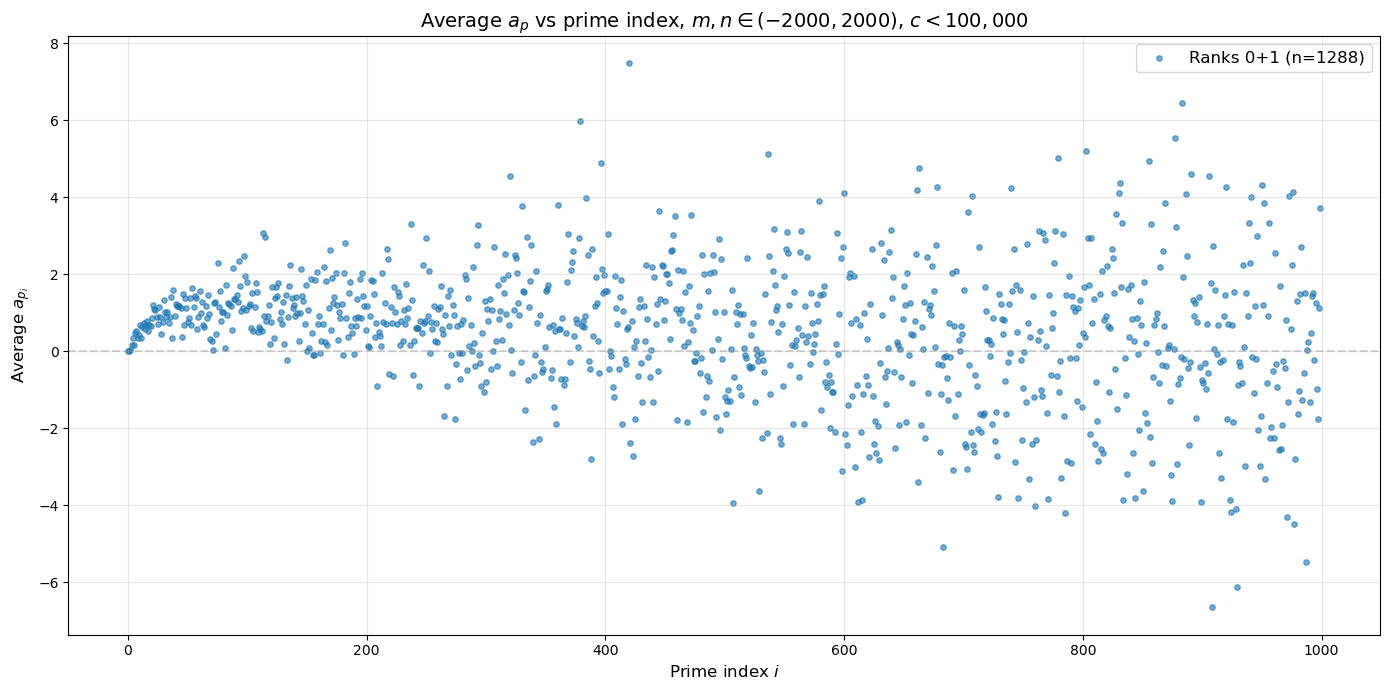

In [38]:
import matplotlib.pyplot as plt

N = 1000
nmin = -2000
nmax = 2000
plt.figure(figsize=(14, 7))
plt.scatter(range(N), rks01_avg_aps[:N], alpha=0.6, s=15, label=f"Ranks 0+1 (n={len(rks01_aps)})")
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
plt.legend(fontsize=12)
plt.xlabel(r"Prime index $i$", fontsize=12)
plt.ylabel(r"Average $a_{p_i}$", fontsize=12)
plt.title(fr"Average $a_p$ vs prime index, $m,n\in({nmin},{nmax})$, $c<100,000$", fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'HV_curves/({nmin},{nmax})_ap_averages_ranks01.png', dpi=150)
plt.show()

In [20]:
Primes(1)[1]

3